## Drug Selection Based On Patient Response

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
drug_df = pd.read_csv(path, delimiter=",")
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
drug_df.shape

(200, 6)

In [4]:
drug_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
drug_df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
drug_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
for column in drug_df[['BP', 'Cholesterol', 'Sex']]:
  columnseriesobj = drug_df[column]
  print('unique values for', column,':', columnseriesobj.unique())

unique values for BP : ['HIGH' 'LOW' 'NORMAL']
unique values for Cholesterol : ['HIGH' 'NORMAL']
unique values for Sex : ['F' 'M']


## Exploratory Data Analysis

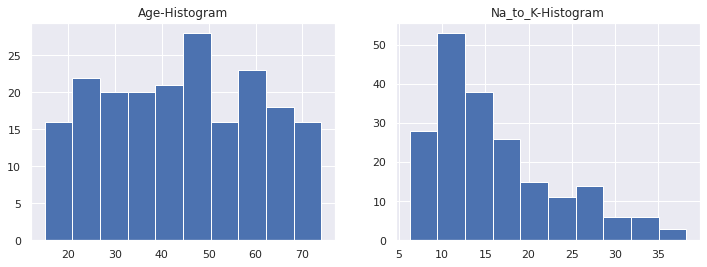

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
for i, column in enumerate(['Age','Na_to_K']):
  ax = plt.subplot(1,2,i+1)
  drug_df[column].hist()
  plt.title("%s-Histogram" %column)


In [9]:
def plots(data, fig):
  plt.subplot(4,3,fig)
  sns.countplot(x = data, data = drug_df)
  plt.title(data+ ' Histogram')

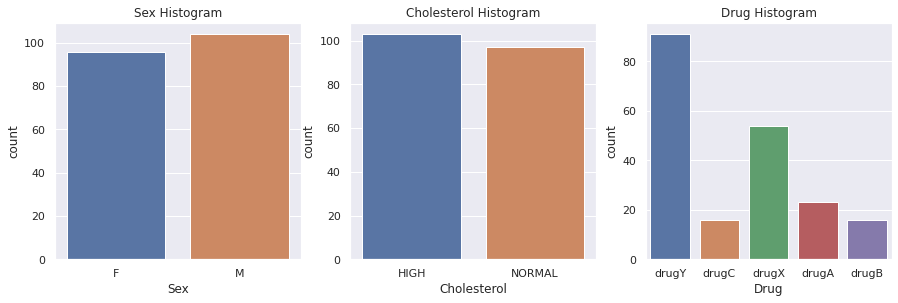

In [10]:
plt.figure(figsize=(15,20))
plots('Sex', 1)
plots('Cholesterol', 2)
plots('Drug', 3)

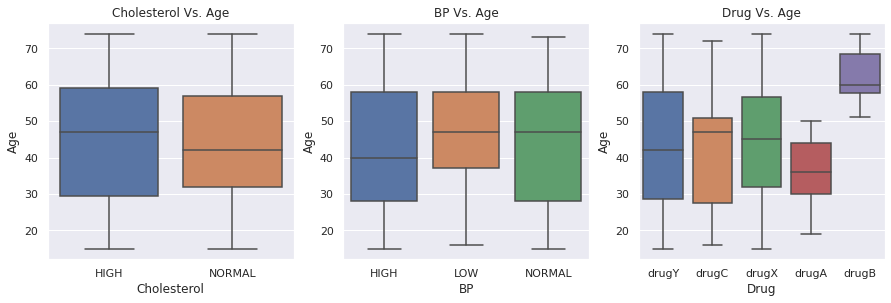

In [11]:
def box(data, fig):
  plt.subplot(4, 3, fig)
  sns.boxplot(x = data, y = drug_df['Age'], data = drug_df)
  plt.title(data+ ' Vs. Age')

plt.figure(figsize=(15,20))
box('Cholesterol', 1)
box('BP', 2)
box('Drug', 3)

## Model Development

In [12]:
X = drug_df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

### Setting Dummy Variables

Decision Trees don't take in categorical variables, so it is best practice to set dummy variables for categorical variables

In [13]:
from sklearn import preprocessing
model_sex = preprocessing.LabelEncoder()
model_sex.fit(['F','M'])
X[:,1] = model_sex.transform(X[:,1])

model_BP = preprocessing.LabelEncoder()
model_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = model_BP.transform(X[:,2])

model_cholesterol = preprocessing.LabelEncoder()
model_cholesterol.fit(['NORMAL', 'HIGH'])
X[:,3] = model_cholesterol.transform(X[:,3])

X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [14]:
Y = drug_df['Drug']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)

In [16]:
print(X_train.shape)
print(y_train.shape)

(140, 5)
(140,)


In [17]:
X_train[:5]

array([[31, 1, 0, 1, 17.069],
       [28, 0, 2, 0, 7.798],
       [57, 0, 2, 1, 25.893],
       [31, 1, 0, 0, 30.366],
       [62, 1, 2, 0, 16.594]], dtype=object)

### Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
drug_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
drug_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [19]:
drug_predict = drug_tree.predict(X_test)

In [20]:
drug_predict[0:5]

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugX'], dtype=object)

## Model Evaluation

In [21]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, drug_predict))

0.9833333333333333


### F1 score

In [22]:
from sklearn.metrics import f1_score
print(metrics.f1_score(y_test, drug_predict, average='weighted'))

0.9831322751322752


### Jaccard Index

In [23]:
from sklearn.metrics import jaccard_score
print(metrics.jaccard_score(y_test, drug_predict, average='weighted'))

0.9671875


### Decision Tree

[Text(0.625, 0.9, 'X[4] <= 14.588\nentropy = 1.968\nsamples = 140\nvalue = [20, 8, 11, 41, 60]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\nentropy = 1.72\nsamples = 80\nvalue = [20, 8, 11, 41, 0]'),
 Text(0.25, 0.5, 'X[0] <= 50.5\nentropy = 0.863\nsamples = 28\nvalue = [20, 8, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0, 0]'),
 Text(0.75, 0.5, 'X[2] <= 1.5\nentropy = 0.744\nsamples = 52\nvalue = [0, 0, 11, 41, 0]'),
 Text(0.625, 0.3, 'X[3] <= 0.5\nentropy = 0.995\nsamples = 24\nvalue = [0, 0, 11, 13, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 60\nvalue = [0, 0, 0, 0, 60]')]

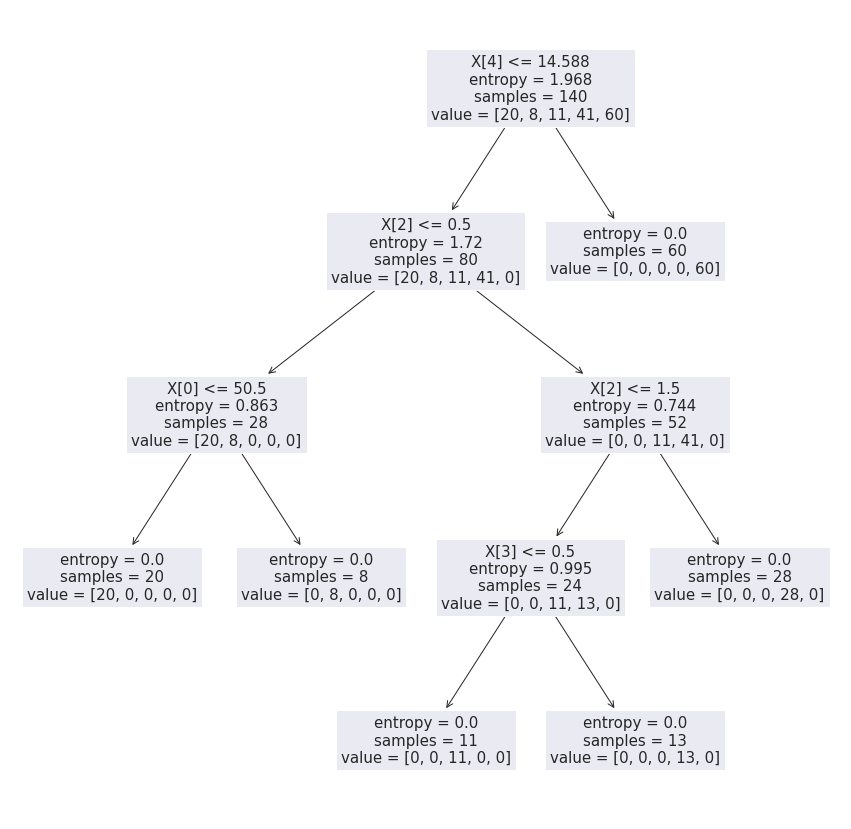

In [28]:
import sklearn.tree as tree
plt.figure(figsize=(15,15))
tree.plot_tree(drug_tree)


From this decision tree, observe how entropy (uncertainty) reduces down the nodes until it reaches zero shows us how much information our model gains

## Conclusion
I have made a  classification model using decision trees that can help healthcare agencies to select the best drug to give a patient suffering from similar illnesses based on their  Sex, Blood Pressure levels, Sodium-Potassium pump and Cholesterol levels